## Metro Traffic volume dataset  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore') 
  

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/SaeedShaikh786/demo_pipeline/main/notebook/data/Metro_Interstate_Traffic_Volume.csv")

### tasks to do
- drop rain
- drop snow
- drop holiday
- create weekday column
- check the categories weather_main and weather_description
- make hours in parts categorical

# Data description

```
holiday                Categorical    US National holidays plus regional holiday, Minnesota State Fair
temp                   Numeric        Average temp in kelvin
rain_1h                Numeric        Amount in mm of rain that occurred in the hour
snow_1h                Numeric        Amount in mm of snow that occurred in the hour
clouds_all             Numeric        Percentage of cloud cover
weather_main           Categorical    Short textual description of the current weather
weather_description    Categorical    Longer textual description of the current weather
date_time              DateTime       Hour of the data collected in local CST time
traffic_volume         Numeric        Hourly I-94 ATR 301 reported westbound traffic volume
```

In [ ]:
data.head(10)

In [ ]:
data.holiday.value_counts()

In [ ]:
(data.holiday!="None").sum()

In [ ]:
data.temp.describe()

In [ ]:
data.describe()

In [4]:
data["date_time"]=pd.to_datetime(data["date_time"])


In [5]:
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-02-10 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-02-10 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-02-10 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-02-10 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-02-10 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [2]:
pip install mlflow


  Using cached mlflow-2.7.1-py3-none-any.whl (18.5 MB)
  Using cached sqlparse-0.4.4-py3-none-any.whl (41 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached docker-6.1.3-py3-none-any.whl (148 kB)
  Using cached databricks_cli-0.18.0-py2.py3-none-any.whl (150 kB)
  Using cached waitress-2.1.2-py3-none-any.whl (57 kB)
  Using cached pyarrow-13.0.0-cp39-cp39-win_amd64.whl (24.4 MB)
  Using cached alembic-1.12.0-py3-none-any.whl (226 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
  Using cached pywin32-306-cp39-cp39-win_amd64.whl (9.3 MB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Attempting uninstall: pywin32
    Found existing installation: pywin32 302
    Uninstalling pywin32-302:
      Successfully uninstalled pywin32-302
  Rolling back uninstall of pywin32
  Moving to c:\users\admin\anaconda3\lib\site-packages\__pycache__\pythoncom.cpython-39.pyc
   from C:\Users\admin\AppDa

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\admin\\anaconda3\\Lib\\site-packages\\win32\\_win32sysloader.pyd'
Consider using the `--user` option or check the permissions.



In [6]:
data.date_time[0].weekday()

4

In [5]:
data["hour"]=list(map(lambda x:x.hour,list(data.date_time)))
data["weekday"]=list(map(lambda x:x.weekday(),list(data.date_time)))

In [ ]:
data.head()

In [6]:
data.drop(["date_time","rain_1h","snow_1h"],axis=1,inplace=True)

In [ ]:
data

In [ ]:
data.columns

In [ ]:
data.weather_main.value_counts()


In [7]:
data=data[data.temp!=0.0]

In [ ]:
data.temp.min() - 273.15


In [8]:
data.drop(["weather_description"],axis=1,inplace=True)

### hour modify and checking that making category of it will increase score.
```
Early_Morning = [4,5,6,7]
Morning = [8,9,10,11]
Afternoon = [12,13,14,15]
Evening = [16,17,18,19]
Night = [20,21,22,23]
Late_Night = [24,1,2,3]

def modify_hour(x):
    if x in Early_Morning:
        return "Early_morning"
    elif x in Morning:
        return "Morning"
    elif x in Afternoon:
        return "Afternoon"
    elif x in Evening:
        return "Evening"
    elif x in Night:
        return "Night"
    else :
        return "Late_Night"
```

In [ ]:
#data.hour=data.hour.map(modify_hour)

In [ ]:
#data.hour.value_counts()

In [9]:
def modify_holiday(x):
    if x =="None":
        return "no"
    else:
        return "yes"

In [10]:
data.holiday=data.holiday.map(modify_holiday)

In [20]:
data

,holiday,temp,clouds_all,weather_main,traffic_volume,hour,weekday
0,no,288.28,40,Clouds,5545,9,4
1,no,289.36,75,Clouds,4516,10,4
2,no,289.58,90,Clouds,4767,11,4
3,no,290.13,90,Clouds,5026,12,4
4,no,291.14,75,Clouds,4918,13,4
...,...,...,...,...,...,...,...
48199,no,283.45,75,Clouds,3543,19,6
48200,no,282.76,90,Clouds,2781,20,6
48201,no,282.73,90,Thunderstorm,2159,21,6
48202,no,282.09,90,Clouds,1450,22,6


In [11]:

cat_cols=data.columns[data.dtypes=="O"].to_list()


In [12]:
num_cols=["hour","temp","clouds_all","Weekday"]

In [13]:

data.weekday.unique()

array([4, 5, 1, 3, 6, 0, 2], dtype=int64)

In [14]:

week=[0,1,2,3,4,5,6]
weekday=[1,2,3,4,5,6,7]

def modify_weekday(x):
    for i in range(len(weekday)):
        if x==i:
            return weekday[i]

In [15]:
data["Weekday"]=data.weekday.map(modify_weekday)

In [16]:
data.drop("weekday",axis=1,inplace=True)

In [17]:
data

,holiday,temp,clouds_all,weather_main,traffic_volume,hour,Weekday
0,no,288.28,40,Clouds,5545,9,5
1,no,289.36,75,Clouds,4516,10,5
2,no,289.58,90,Clouds,4767,11,5
3,no,290.13,90,Clouds,5026,12,5
4,no,291.14,75,Clouds,4918,13,5
...,...,...,...,...,...,...,...
48199,no,283.45,75,Clouds,3543,19,7
48200,no,282.76,90,Clouds,2781,20,7
48201,no,282.73,90,Thunderstorm,2159,21,7
48202,no,282.09,90,Clouds,1450,22,7


In [18]:
data["Weekday"].astype(object)

0        5
1        5
2        5
3        5
4        5
        ..
48199    7
48200    7
48201    7
48202    7
48203    7
Name: Weekday, Length: 48194, dtype: object

In [19]:
data.Weekday.value_counts()

5    6971
3    6906
6    6875
1    6873
2    6864
7    6855
4    6850
Name: Weekday, dtype: int64

In [20]:
cat_cols.append("Weekday")

In [21]:
cat_cols

['holiday', 'weather_main', 'Weekday']

In [22]:
num_cols.remove("Weekday")

In [23]:
num_cols


['hour', 'temp', 'clouds_all']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


In [25]:
X=data.drop("traffic_volume",axis=1)
y=data["traffic_volume"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33735, 6)
(14459, 6)
(33735,)
(14459,)


In [27]:
X_train

,holiday,temp,clouds_all,weather_main,hour,Weekday
24221,no,290.89,0,Clear,3,4
46012,no,291.35,90,Mist,6,5
28413,no,275.34,90,Haze,15,4
17790,no,297.62,75,Clouds,15,5
23725,no,290.76,90,Rain,12,6
...,...,...,...,...,...,...
11284,no,248.79,40,Clouds,7,2
44742,no,293.08,1,Clear,23,3
38168,no,288.28,1,Clear,22,4
860,no,269.24,20,Clouds,7,7


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [29]:
num_pipeline=Pipeline(
        steps=[("imputer",SimpleImputer()),
       
        ("scalar",StandardScaler())] )

cat_pipeline = Pipeline(
    steps=[("imputer",SimpleImputer(strategy="most_frequent")),("encoder",OneHotEncoder(sparse=False,handle_unknown="ignore"))]
)

pipeline=ColumnTransformer([("num_pipeline",num_pipeline,num_cols),
                            ("cat_pipeline",cat_pipeline,cat_cols)])


In [30]:
X_train=pipeline.fit_transform(X_train)
X_test=pipeline.transform(X_test)

In [35]:
#D=pd.DataFrame(X_train,columns=pipeline.get_feature_names_out());D

In [36]:
#D["cat_pipeline__holiday_yes"].value_counts()

model

## Linear regression

In [31]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [38]:
models={"Lasso":Lasso(),"Ridge":Ridge(),"RandomForest":RandomForestRegressor(),
        "GradientBoosting":GradientBoostingRegressor(),"Adaboost":AdaBoostRegressor(),"KNN-regressor":KNeighborsRegressor()}

In [39]:
list(models.keys())[2]

'RandomForest'

In [40]:
models["RandomForest"]

RandomForestRegressor()

## ALL model output

In [41]:
import numpy as np
models={"Lasso":Lasso(),"Ridge":Ridge(),"RandomForest":RandomForestRegressor(),
        "GradientBoosting":GradientBoostingRegressor(),"Adaboost":AdaBoostRegressor(),"KNN-regressor":KNeighborsRegressor()}
scores={}
def evaluate_model(models):
    for i in range(len(models)):
        model_name=list(models.keys())[i]
        model=models[model_name]
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        n=len(y_pred)
        # evaluation
        r2=r2_score(y_test,y_pred)
        mse=mean_squared_error(y_test,y_pred)
        adj_r_squared = 1 - (1 - r2) * (n - 1) / (n - X_train.shape[1] - 1)
        scores[model_name]=adj_r_squared
        
        print(f"For Model : {model_name}\n")
        print(f"R2 square :{r2}")
        print(f"mean square error :{mse}")
        print(f"Root mean Sq error :{np.sqrt(mse)}")
        print(f"adjusted R2 square :{adj_r_squared}")
        print(50*"*")
        print("\n")
    max_score=max(list(scores.values()))
    best_model=[key for key ,value in scores.items() if value==max_score]
    
    print(f"{20*'*'} best model is {best_model[0]} :{max_score} {20*'*'}")
        
evaluate_model(models)

For Model : Lasso

R2 square :0.16615001373771066
mean square error :3313464.638025422
Root mean Sq error :1820.292459476065
adjusted R2 square :0.164821399280902
**************************************************


For Model : Ridge

R2 square :0.1661106659864655
mean square error :3313620.9939461327
Root mean Sq error :1820.3354069912866
adjusted R2 square :0.16478198883493722
**************************************************


For Model : RandomForest

R2 square :0.8398617149295395
mean square error :636340.5330897252
Root mean Sq error :797.7095543427603
adjusted R2 square :0.8396065586734522
**************************************************


For Model : GradientBoosting

R2 square :0.8341962934425599
mean square error :658853.1841251499
Root mean Sq error :811.6977172107544
adjusted R2 square :0.8339321101899917
**************************************************


For Model : Adaboost

R2 square :0.7549689096227775
mean square error :973678.5591627418
Root mean Sq error :986.75

MemoryError: Unable to allocate 1.00 GiB for an array with shape (3978, 33735) and data type float64

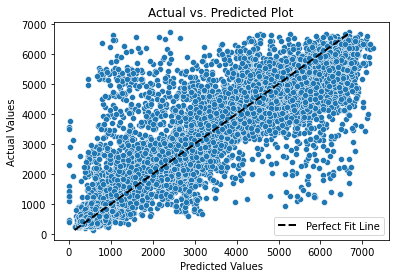

In [42]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], 'k--', lw=2, label="Perfect Fit Line")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend()
plt.title("Actual vs. Predicted Plot")
plt.show()


### Feature importance

In [43]:
#mportances = model.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

In [45]:
#feature_names=list(pipeline.get_feature_names_out())
#forest_importances = pd.Series(importances, index=feature_names)

#fig, ax = plt.subplots()
#forest_importances.plot.barh(yerr=std, ax=ax)

In [ ]:
#pip install xgboost

In [ ]:
#from xgboost import XGBRegressor,XGBRFRegressor

In [ ]:
#model=XGBRegressor(n_estimators=100,  # Number of boosting rounds (trees)
 #                   learning_rate=0.1,  # Step size shrinkage to prevent overfitting
  #                  max_depth=3,  # Maximum depth of each tree
   #                 objective='reg:squarederror')

In [ ]:
#model.fit(X_train,y_train)

In [ ]:
#y_pred=model.predict(X_test)

In [ ]:
#r2_score(y_true=y_test,y_pred=y_pred)

# Hyperparameter Tuning

In [56]:
models={"RandomForestRegressor":RandomForestRegressor(oob_score=True),
        "GradientBoostingRegressor":GradientBoostingRegressor(),"AdaBoostRegressor":AdaBoostRegressor(),"KNN-regressor":KNeighborsRegressor()}

params={"RandomForestRegressor":{"criterion":['squared_error', 'absolute_error'],"max_features":['sqrt', 'log2']},
        
       "GradientBoostingRegressor":{'loss':['squared_error', 'absolute_error', 'huber'],'learning_rate':[0.02,0.03,0.1,0.2],
                                  "n_estimators":[70,100,150,180] },
        "AdaBoostRegressor":{"n_estimators":[50,100,150],"learning_rate":[0.01,0.03,0.1,0.2],"loss":['linear', 'square', 'exponential']},
       
       "KNN-regressor":{'n_neighbors':[5,6,7,9],"algorithm":['auto', 'ball_tree', 'kd_tree']}}

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
## models={"GradientBoostingRegressor":GradientBoostingRegressor()}
## params={"GradientBoostingRegressor":{"loss":['squared_error', 'absolute_error'],'learning_rate':[0.02,0.03,0.09]}}
def Evaluate_models(models,params):
    Report={}
    MODELS={}
    for i in range(len(models)):
        
        model_name=list(models.keys())[i]
        model=models[model_name]
        param=params[model_name]
        Random_cv=RandomizedSearchCV(estimator=model,param_distributions=param,cv=2)
        Random_cv.fit(X_train,y_train)
        model.set_params(**Random_cv.best_params_)
        print(Random_cv.best_params_)
        n=len(y_test)
        model.fit(X_train,y_train)
        MODELS[model_name]=model.set_params(**Random_cv.best_params_)
        y_pred=model.predict(X_test)
        r2=r2_score(y_true=y_test,y_pred=y_pred)
        adj_r_squared = 1 - (1 - r2) * (n - 1) / (n - X_train.shape[1] - 1)
        
        Report[model_name]=adj_r_squared
        
        return Report,MODELS

In [59]:
Report,MODELS=Evaluate_models(models,params);Report,MODELS

In [51]:
#m=MODELS["GradientBoostingRegressor"]

In [53]:
#m=models["GradientBoostingRegressor"]

In [60]:
#m.predict(X_test)

In [61]:
#m.get_params()

In [46]:
data.to_csv("../Notebooks/data/metro.csv",index=False)